In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
match_data = pd.read_csv('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\matchDataProcessed.csv')
wins = pd.read_csv('C:\\Users\\Facu\\PycharmProjects\\Proyecto_Final_IA\\proyecto_final\\data\\matchDataWins.csv')

In [3]:
win_team1 = pd.DataFrame(wins['win_team1'])
win_team2 = pd.DataFrame(wins['win_team2'])

<Axes: xlabel='win_team1', ylabel='count'>

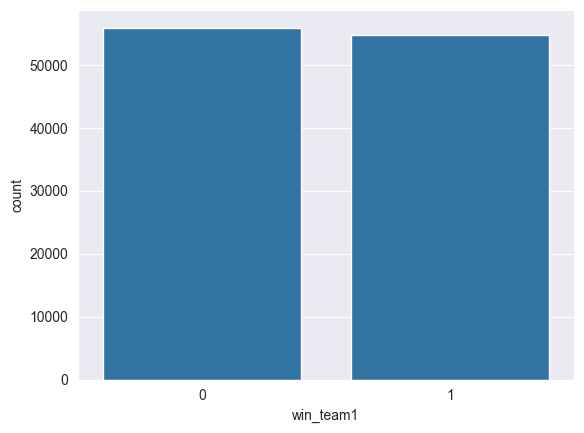

In [4]:
#Graficar la cantidad de victrorias con respecto a las derrotas de un equipo
sns.countplot(x='win_team1', data=wins)

In [5]:
# Elimina las columnas de firstBaron de los datos
match_data = match_data.drop(['firstBaronTeam1', 'firstBaronTeam2'], axis=1)

In [6]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
predictors = match_data
predictors_train, predictors_test, wins_team1_train, wins_team1_test, wins_team2_train, wins_team2_test = train_test_split(predictors, win_team1, win_team2, test_size=0.2, random_state=42)

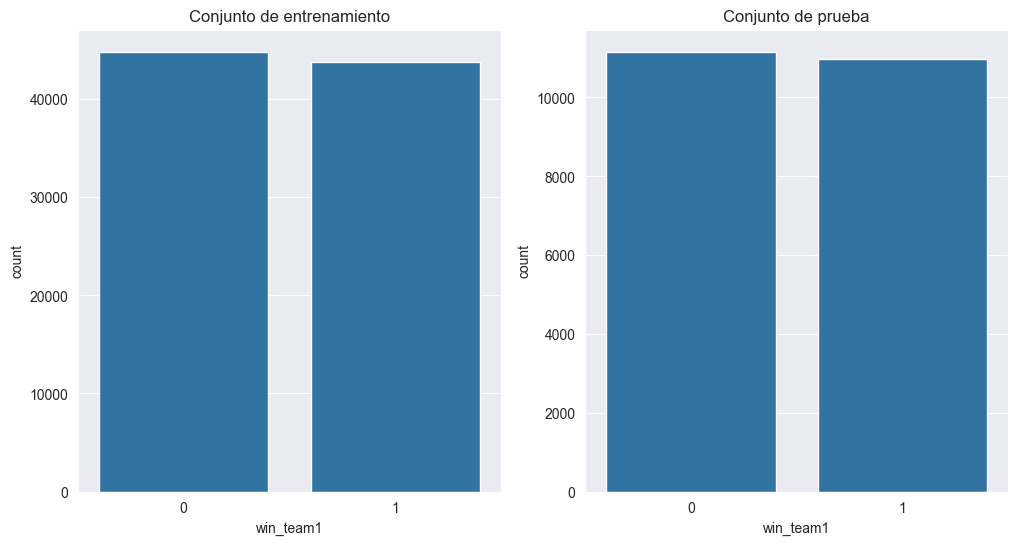

In [7]:
# graficar la cantidad de victorias y derrotas en el conjunto de entrenamiento y prueba
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='win_team1', data=wins_team1_train, ax=ax[0])
ax[0].set_title('Conjunto de entrenamiento')
sns.countplot(x='win_team1', data=wins_team1_test, ax=ax[1])
ax[1].set_title('Conjunto de prueba')
plt.show()

In [8]:
# Inicializa el clasificador
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, min_impurity_decrease=0.0001)

# Entrena el modelo
random_forest_model.fit(predictors_train, wins_team1_train)

C:\Users\Facu\PycharmProjects\Proyecto_Final_IA\venv\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_impurity_decrease=0.0001, n_jobs=-1, random_state=42)

In [9]:
wins_pred_test = random_forest_model.predict(predictors_test)
wins_pred_train = random_forest_model.predict(predictors_train)


# Evalúa el rendimiento del modelo
accuracy = accuracy_score(wins_team1_test, wins_pred_test)
print(f'Accuracy in test data: {accuracy}')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)
print(f'Accuracy in train data: {accuracy}')

Accuracy in test data: 0.7427629499164522
Accuracy in train data: 0.7418455250589923


Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win            8198            2964
Actual Lose           2732            8249


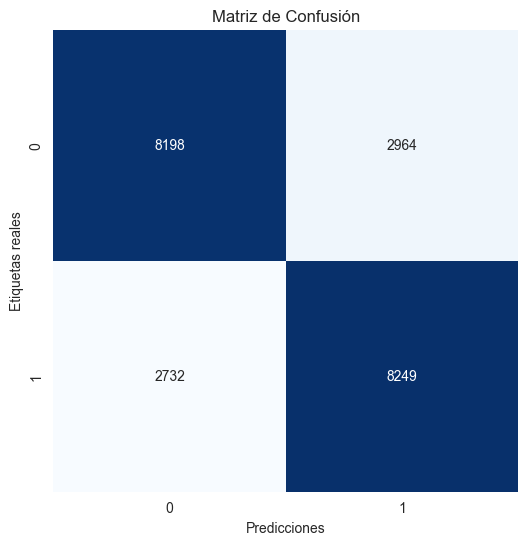

In [10]:
# Crear la matriz de confusión para datos de prueba del team1
conf_matrix = confusion_matrix(wins_team1_test, wins_pred_test)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_test),
            yticklabels=np.unique(wins_team1_test))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

Matriz de Confusión:
             Predicted Win  Predicted Lose
Actual Win           32921           11901
Actual Lose          10964           32785


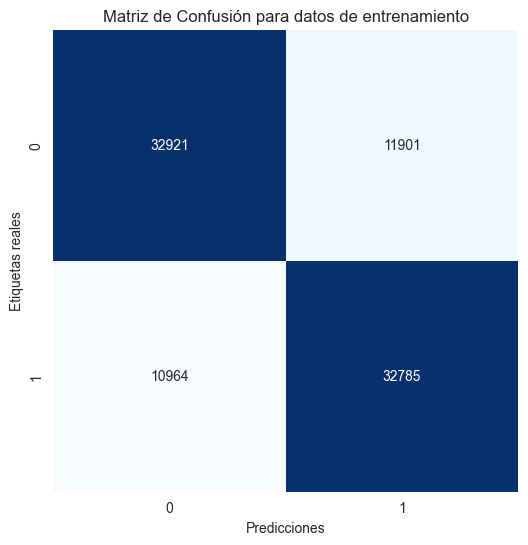

In [12]:
# Crear matriz de confusión para datos de entrenamiento del team1
conf_matrix = confusion_matrix(wins_team1_train, wins_pred_train)

# Crear un DataFrame de pandas para visualizar mejor la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Win', 'Actual Lose'], columns=['Predicted Win', 'Predicted Lose'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix_df)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(wins_pred_train),
            yticklabels=np.unique(wins_team1_train))
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión para datos de entrenamiento')
plt.show()

In [18]:
# Calcular la precisión para team1: 
precision = precision_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la sensibilidad (recall) para team1: 
recall = recall_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la puntuación F1 para team1: 
f1 = f1_score(wins_team1_test, wins_pred_test, average='weighted')

# Calcular la exactitud para team1: 
accuracy = accuracy_score(wins_team1_test, wins_pred_test)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7431
Sensibilidad (Recall): 0.7428
Puntuación F1: 0.7428
Exactitud: 0.7428


In [19]:
# Calcular métricas para datos de entrenamiento
precision = precision_score(wins_team1_train, wins_pred_train, average='weighted')
recall = recall_score(wins_team1_train, wins_pred_train, average='weighted')
f1 = f1_score(wins_team1_train, wins_pred_train, average='weighted')
accuracy = accuracy_score(wins_team1_train, wins_pred_train)

# Imprimir las métricas
print(f'Precisión: {precision:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Puntuación F1: {f1:.4f}')
print(f'Exactitud: {accuracy:.4f}')

Precisión: 0.7421
Sensibilidad (Recall): 0.7418
Puntuación F1: 0.7418
Exactitud: 0.7418


In [21]:
# Ver la importancia de cada columna
feature_importances = random_forest_model.feature_importances_
print('Importancia de las características:')
sorted(feature_importances, reverse=True)
for i, importance in enumerate(feature_importances):
     print(f'{random_forest_model.feature_names_in_[i]}: {importance}')

Importancia de las características:
gameDuration: 0.06851170502491766
firstBloodTeam1: 0.03001598028260028
firstTowerTeam1: 0.2733055218224415
firstDragonTeam1: 0.08688268116272066
firstRiftHeraldTeam1: 0.06265976475293276
ban1Team1: 0.00011335919681028513
ban2Team1: 0.00010025634549562427
ban3Team1: 6.277822603065063e-05
ban4Team1: 9.841621723042107e-05
ban5Team1: 8.643620267865359e-05
champ1Team1: 0.00021095096455599262
champ2Team1: 0.00016188466518364043
champ3Team1: 0.0001712434163138651
champ4Team1: 0.00010390346531324121
champ5Team1: 0.00010738305276339337
firstBloodTeam2: 0.026921436849218286
firstTowerTeam2: 0.2856190178952179
firstDragonTeam2: 0.08643400573863975
firstRiftHeraldTeam2: 0.07691024002591257
ban1Team2: 5.500034063055798e-05
ban2Team2: 9.278930456373748e-05
ban3Team2: 0.0001105983865714725
ban4Team2: 9.41927199354787e-05
ban5Team2: 0.00013980650279439875
champ1Team2: 0.00021780187557014714
champ2Team2: 0.00012535078273490623
champ3Team2: 0.00011728356823577177
cham

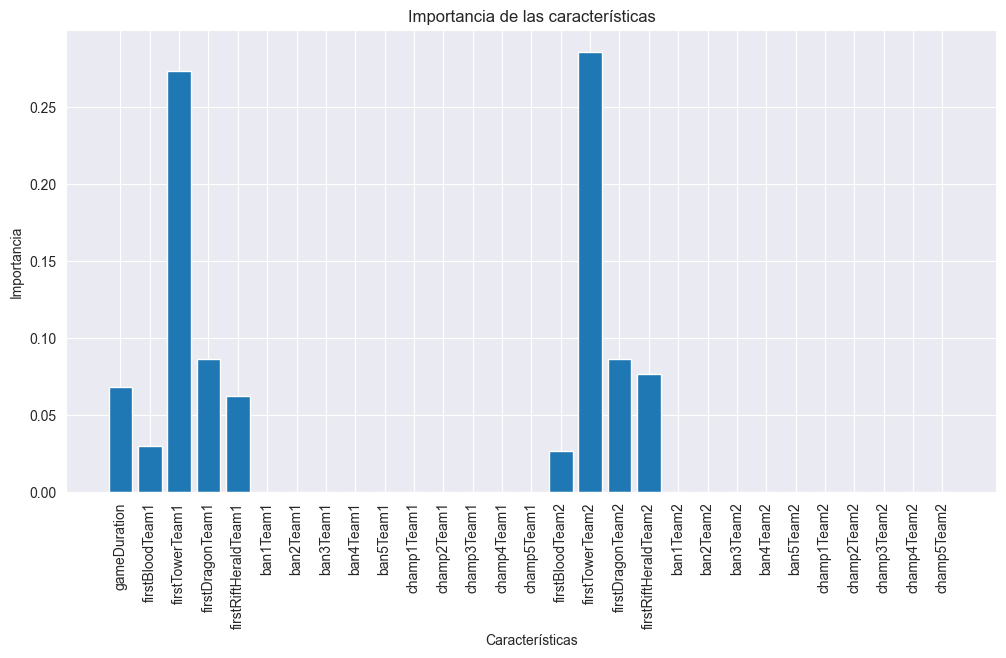

In [22]:
# Creamos un grafico de barras que muestre la importancia de cada caracteristica
plt.figure(figsize=(12, 6))
plt.bar(random_forest_model.feature_names_in_, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()